<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>


Thank you for the updates! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Elizabeth! Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- Analyzed distributions. It is a very important step that helps us identify outliers and choose the most appropriate data preprocessing steps;    
    
    
- Handled outliers; 
    
    
- Excluded irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

    

- Trained and compared several models, great!

    
- Measured their training and prediction speed.
   

- Tuned hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value;


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

    

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,


    
- Check the data for the duplicates after you drop columns. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same; 
    
    
- Please split the data first, only then we need to scale or encode it to avoid data leakage;
  

    
- Add the final conclusion please. A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. 


There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are just several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

## Rusty Bargain Data Analysis
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb

In [2]:
#import dataset

df = pd.read_csv('/datasets/car_data.csv')
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
299611,05/03/2016 19:53,8300,coupe,2014,auto,71,fortwo,20000,3,petrol,smart,no,04/03/2016 00:00,0,23730,17/03/2016 11:45
203529,08/03/2016 15:48,1200,NaN,2005,manual,101,passat,150000,8,NaN,volkswagen,NaN,08/03/2016 00:00,0,53332,10/03/2016 10:44
122018,26/03/2016 14:37,4150,NaN,2017,NaN,0,golf,150000,0,gasoline,volkswagen,NaN,26/03/2016 00:00,0,45888,06/04/2016 02:17
129061,28/03/2016 10:56,4499,NaN,2016,manual,125,astra,150000,6,petrol,opel,no,28/03/2016 00:00,0,45478,02/04/2016 14:18
217584,27/03/2016 19:54,5800,suv,2006,auto,163,other,150000,3,gasoline,hyundai,no,27/03/2016 00:00,0,38543,05/04/2016 18:16


In [3]:
#Change data type of DateCrawled, DateCreated and LastSeen to datetime

df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format= '%d/%m/%Y %H:%M')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format= '%d/%m/%Y %H:%M')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format= '%d/%m/%Y %H:%M')

#check to see that coversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Mileage            354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  NotRepaired        283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

Next we will look into the missing values for VehicleType, Model, Gearbox, FuelType and  NotRepaired columns to see if it is important to fill these missing values and how to best do so.

In [4]:
print(df['VehicleType'].unique())
display(df[df['VehicleType'].isna()])
print(df['VehicleType'].isna().sum()/354369)

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:00,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
16,2016-04-01 12:46:00,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01,0,38871,2016-04-01 12:46:00
22,2016-03-23 14:52:00,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,0,49716,2016-03-31 01:16:00
26,2016-03-10 19:38:00,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:00
31,2016-03-29 16:57:00,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,NaN,2016-03-29,0,37075,2016-03-29 17:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354346,2016-03-07 17:06:00,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07,0,61169,2016-03-08 21:28:00
354351,2016-03-11 23:40:00,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:00
354361,2016-03-09 13:37:00,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,2016-03-09,0,51371,2016-03-13 01:44:00
354364,2016-03-21 09:50:00,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00


0.1057936783409384


Over 10% of these values are missing.  We will fill these with 'unknown'.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's a good decision to fill in the gaps with some unique value, it's better than deleting them. Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases. We even should not use median or mode. Even though the median does not skew the distribution, we have to many missing values to fill in because there is a risk of biasing the data.   
    
</div>

In [5]:
df['VehicleType']= df['VehicleType'].fillna('unknown')
print(df['VehicleType'].unique())

['unknown' 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon'
 'other']


In [6]:
print(df['Model'].unique())
display(df[df['Model'].isna()])
print(df['Model'].isna().sum()/354369)

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensis' 'roomster' 'sl' 'kaefer' 'santa' 'cooper' 'leon'
 '4

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
59,2016-03-29 15:48:00,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29,0,53721,2016-04-06 01:44:00
81,2016-04-03 12:56:00,350,small,1997,manual,54,NaN,150000,3,NaN,fiat,yes,2016-04-03,0,45665,2016-04-05 11:47:00
115,2016-03-20 18:53:00,0,small,1999,NaN,0,NaN,5000,0,petrol,volkswagen,NaN,2016-03-20,0,37520,2016-04-07 02:45:00
135,2016-03-27 20:51:00,1450,sedan,1992,manual,136,NaN,150000,0,NaN,audi,no,2016-03-27,0,38709,2016-04-05 20:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354245,2016-03-07 16:37:00,560,small,2001,auto,170,NaN,90000,0,petrol,fiat,yes,2016-03-07,0,55743,2016-03-12 21:45:00
354321,2016-03-15 13:52:00,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,2016-03-15,0,91186,2016-03-17 08:16:00
354338,2016-03-31 19:52:00,180,unknown,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31,0,41470,2016-04-06 14:18:00
354351,2016-03-11 23:40:00,1900,unknown,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:00


0.055605879746817584


Just over 5% of this data is missing, but we can fill these and add them to the 'other' category

In [7]:
df['Model']= df['Model'].fillna('other')
print(df['Model'].value_counts())

other                 44126
golf                  29232
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed. 

</div>

In [8]:
print(df['Gearbox'].unique())
display(df[df['Gearbox'].isna()])
print(df['Gearbox'].isna().sum()/354369)

['manual' 'auto' nan]


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,2016-03-11 21:39:00,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11,0,24148,2016-03-19 08:46:00
16,2016-04-01 12:46:00,300,unknown,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01,0,38871,2016-04-01 12:46:00
32,2016-03-15 20:59:00,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15,0,44145,2016-03-17 18:17:00
37,2016-03-28 17:50:00,1500,unknown,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,2016-03-28,0,46483,2016-03-30 09:18:00
40,2016-03-26 22:06:00,0,unknown,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26,0,56412,2016-03-27 17:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354288,2016-03-16 13:36:00,3300,wagon,2006,NaN,0,touran,150000,7,gasoline,volkswagen,NaN,2016-03-16,0,12057,2016-03-17 12:17:00
354305,2016-04-03 13:46:00,3500,unknown,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,2016-04-03,0,74579,2016-04-05 12:44:00
354329,2016-03-30 20:55:00,350,small,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,2016-03-30,0,25436,2016-04-07 13:50:00
354338,2016-03-31 19:52:00,180,unknown,1995,NaN,0,other,125000,3,petrol,opel,NaN,2016-03-31,0,41470,2016-04-06 14:18:00


0.055967085156997366


In [9]:
df['Gearbox']= df['Gearbox'].fillna('unknown')
print(df['Gearbox'].value_counts())

manual     268251
auto        66285
unknown     19833
Name: Gearbox, dtype: int64


In [10]:
print(df['FuelType'].unique())
display(df[df['FuelType'].isna()])
print(df['FuelType'].isna().sum()/354369)

['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
9,2016-03-17 10:53:00,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:00
13,2016-03-21 21:37:00,2500,wagon,2004,manual,131,passat,150000,2,NaN,volkswagen,no,2016-03-21,0,90762,2016-03-23 02:50:00
26,2016-03-10 19:38:00,5555,unknown,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:00
36,2016-03-11 11:50:00,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,2016-03-11,0,2943,2016-04-07 03:46:00
41,2016-03-30 20:38:00,7500,sedan,2002,auto,306,e_klasse,150000,4,NaN,mercedes_benz,NaN,2016-03-30,0,33649,2016-04-03 11:44:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354339,2016-03-20 12:46:00,3850,convertible,2006,manual,108,2_reihe,125000,2,NaN,peugeot,no,2016-03-20,0,53947,2016-03-26 21:18:00
354346,2016-03-07 17:06:00,2600,unknown,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07,0,61169,2016-03-08 21:28:00
354351,2016-03-11 23:40:00,1900,unknown,2000,manual,110,other,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:00
354361,2016-03-09 13:37:00,5250,unknown,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,2016-03-09,0,51371,2016-03-13 01:44:00


0.09282696849893755


In [11]:
df['FuelType']= df['FuelType'].fillna('unknown')
print(df['FuelType'].value_counts())

petrol      216352
gasoline     98720
unknown      32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64


In [12]:
print(df['NotRepaired'].unique())
display(df[df['NotRepaired'].isna()])
print(df['NotRepaired'].isna().sum()/354369)

[nan 'yes' 'no']


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:00,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
8,2016-04-04 23:42:00,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:00
9,2016-03-17 10:53:00,999,small,1998,manual,101,golf,150000,0,unknown,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:00
12,2016-03-15 22:49:00,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,NaN,2016-03-15,0,37269,2016-04-01 13:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354349,2016-03-16 17:06:00,5999,wagon,2005,manual,140,a4,150000,4,gasoline,audi,NaN,2016-03-16,0,56472,2016-03-18 11:30:00
354356,2016-04-04 11:45:00,999,convertible,2000,manual,95,megane,150000,4,petrol,renault,NaN,2016-04-04,0,88477,2016-04-06 12:44:00
354357,2016-03-09 11:36:00,1690,wagon,2004,manual,55,fabia,150000,4,petrol,skoda,NaN,2016-03-09,0,18246,2016-04-04 08:15:00
354365,2016-03-14 17:48:00,2200,unknown,2005,unknown,0,other,20000,1,unknown,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:00


0.20079070121822168


In [13]:
df['NotRepaired']= df['NotRepaired'].fillna('unknown')
print(df['NotRepaired'].value_counts())

no         247161
unknown     71154
yes         36054
Name: NotRepaired, dtype: int64


In [14]:
print(df.isna().sum())

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


In [15]:
print(df.duplicated().sum())

263


There are 262 completely duplicated rows. We will drop these.

In [16]:
df= df.drop_duplicates()
print(df.duplicated().sum())

0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354106 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354106 non-null  datetime64[ns]
 1   Price              354106 non-null  int64         
 2   VehicleType        354106 non-null  object        
 3   RegistrationYear   354106 non-null  int64         
 4   Gearbox            354106 non-null  object        
 5   Power              354106 non-null  int64         
 6   Model              354106 non-null  object        
 7   Mileage            354106 non-null  int64         
 8   RegistrationMonth  354106 non-null  int64         
 9   FuelType           354106 non-null  object        
 10  Brand              354106 non-null  object        
 11  NotRepaired        354106 non-null  object        
 12  DateCreated        354106 non-null  datetime64[ns]
 13  NumberOfPictures   354106 non-null  int64   

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. 
</div>

Now that we have addressed missing values and duplicates we can look at the distribution for each column to get an idea of how things look.

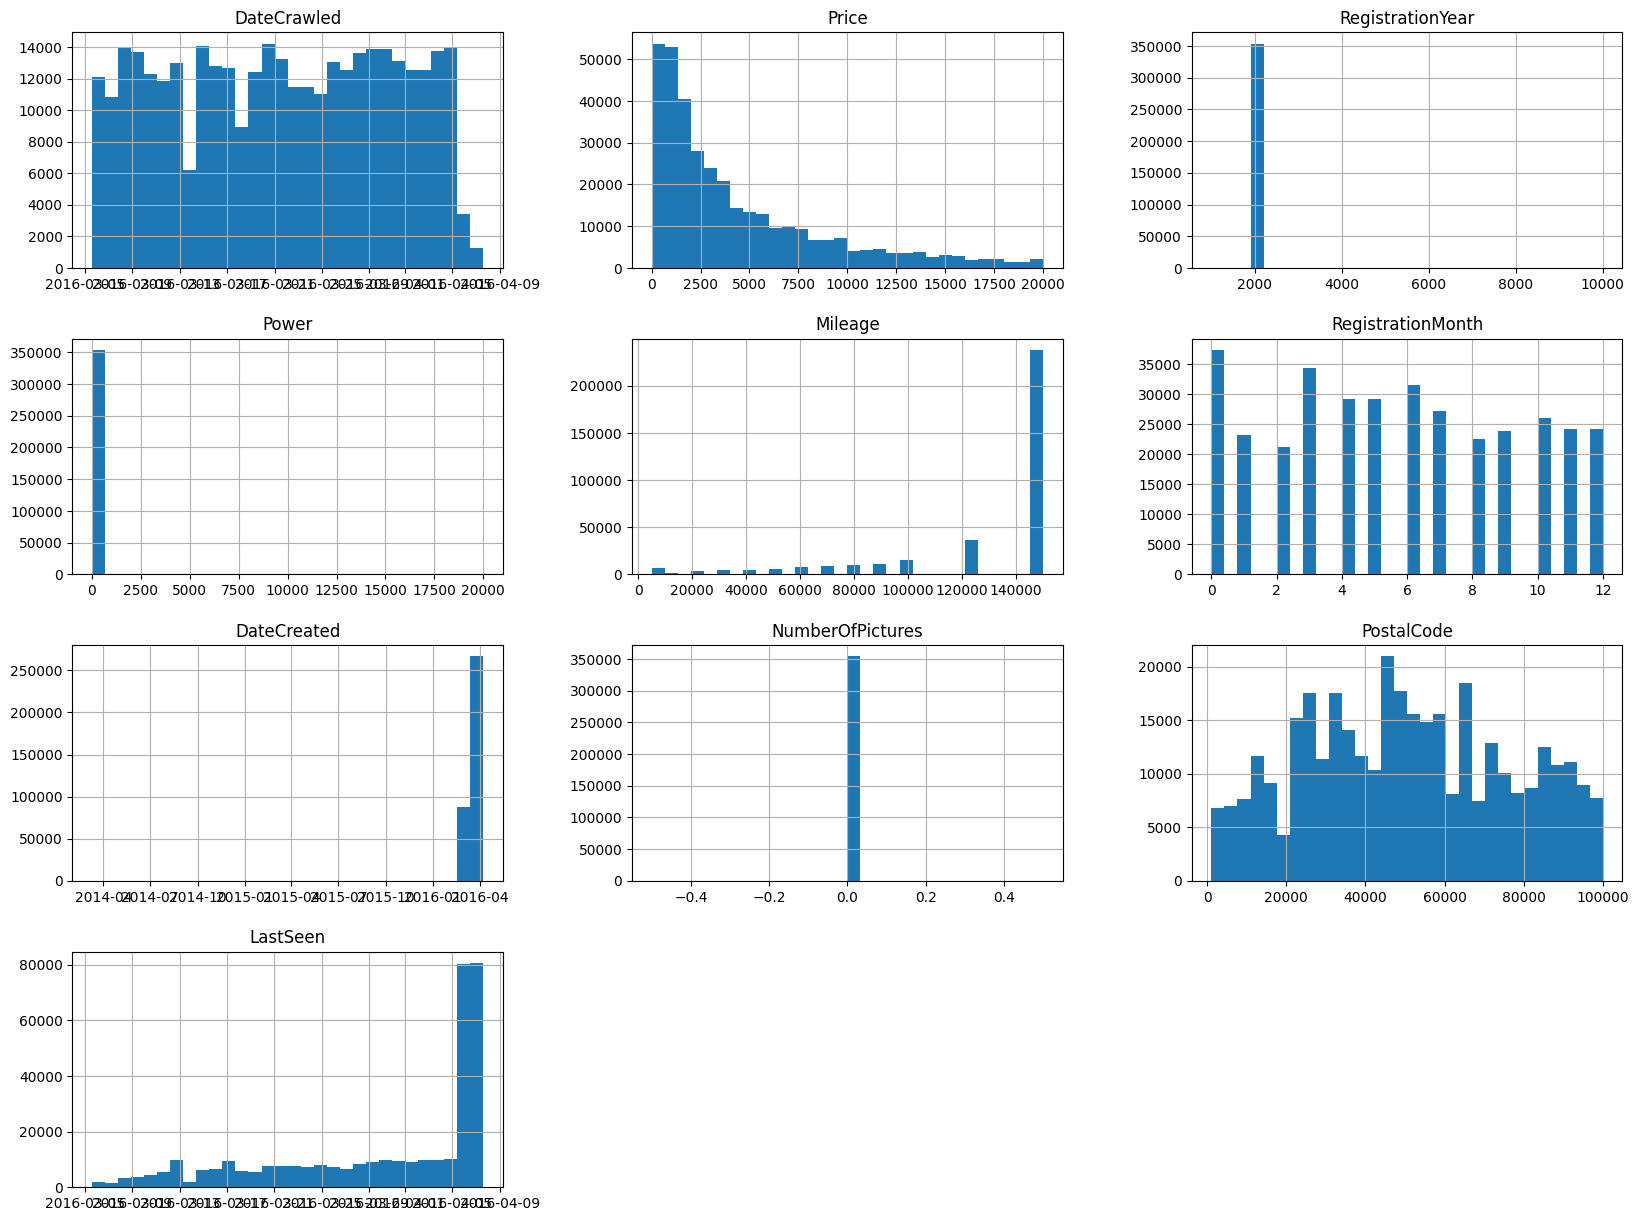

In [18]:
df.hist(bins=30, figsize= (20, 15))
plt.show()

Based on these distributions we can see a few things that stand out right away.  ALL of the values for certain columns are distributed around 1 value.  For registration year it is very concentrated at 2000.  We can assume that this makes since because the values that were selected for the x-axis go up to 10,000 which makes little since for a year as it is impossible to go beyond the current date.  Then for Power it is also very concentrated near 0.  We should look at this category in more detail to see if this makes sense.  Then for NumberOfPictures, it is also focused around 0.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you analyze distributions! Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
</div>

In [19]:
print(df['RegistrationYear'].value_counts())
print(df['RegistrationYear'].unique())

2000    24476
1999    22703
2005    22094
2001    20107
2006    19874
        ...  
4100        1
1200        1
5300        1
8888        1
2290        1
Name: RegistrationYear, Length: 151, dtype: int64
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977
 1961 1960 1966 1975 1963 1964 5000 1954 1958 1967 1959 9999 1956 3200
 1000 1941 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019
 1937 1951 1800 1953 1234 8000 5300 9000 2900 6000 5900 5911 1933 1400
 1950 4000 1948 1952 1200 8500 1932 1255 3700 3800 4800 1942 7000 1935
 1936 6500 1923 2290 2500 1930 1001 9450 1944 1943 1934 1938 1688 2800
 1253 1928 1919 5555 5600 1600 2222 1039 9996 1300 8455 1931 1915 4500
 1920 1602 7800 9229 1947 1927 7100 8200 1946 7500 3500]


Based on this we can see that there is definitely some data in here that does not make sense as a year that a car was registered and can skew our data.  These values include: 5000, 9999, 3200, 1000, 8888, 1500, 2200, 4100, 3000, 2066, 4000, 8500, 1255, 3700, 3800, 4800, 7000, 6500, 2290, 2500, 1688, 2800, 1253, 5555, 5600, 1600, 2222, 1039, 9996, 1300, 8455, 4500, 1602, 7800, 9229, 7100, 8200, 7500, 3500. 

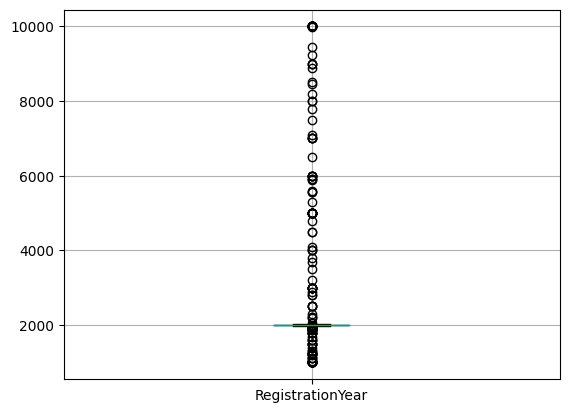

count    354106.000000
mean       2004.235379
std          90.261295
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

In [20]:
df.boxplot(column= 'RegistrationYear')
plt.show()
df['RegistrationYear'].describe()

In [21]:
#take care of outliers by filtering dataset 
df = df.query("(RegistrationYear > 1960) and (RegistrationYear <= 2019)")

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Makes sense!     
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 


</div>

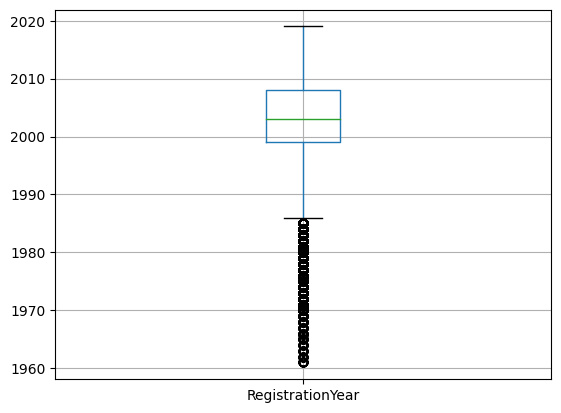

count    353391.000000
mean       2003.173174
std           7.160276
min        1961.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: RegistrationYear, dtype: float64

In [22]:
df.boxplot(column= 'RegistrationYear')
plt.show()
df['RegistrationYear'].describe()

In [23]:
print(df['RegistrationYear'].value_counts())

2000    24476
1999    22703
2005    22094
2001    20107
2006    19874
2003    19741
2004    19600
2002    19077
1998    17889
2007    17166
2008    15377
1997    14655
2009    14492
1996    10826
2010    10755
2017    10440
2011     9901
1995     9603
2016     9597
2012     7175
1994     4838
2013     4128
2018     3959
1993     3437
1992     3002
1990     2803
1991     2761
2014     2536
1989     1318
2015     1299
1988      942
1985      755
1987      667
1980      588
1986      538
1983      430
1984      399
1970      333
1982      316
1978      285
1979      282
1981      263
1972      213
1976      175
1977      173
1973      173
1974      169
1971      167
1975      142
1969      118
1966      113
1968      108
1967       99
1965       82
1964       63
1963       57
1962       46
1961       41
2019       25
Name: RegistrationYear, dtype: int64


To filter the data set we set the lower limit as 1960 as there are likely very few cars on the Rusty Bargain platform that are older than this.  Then we set the upper limit as 2019, because based on this data all other registration years would be in the future.  We still have some outliers on the lower range here, but a much better distribution overall. 

In [24]:
print(df['Power'].value_counts())
print(df['Power'].unique())

0       39775
75      23991
60      15867
150     14568
101     13285
        ...  
645         1
525         1
1922        1
6018        1
902         1
Name: Power, Length: 710, dtype: int64
[    0   190   163    75    69   102   109    50   125   101   105   140
   115   131    60   136   160   231    90   118   193    99   113   218
   122   129    70   306    95    61   177    80   170    55   143    64
   286   232   150   156    82   155    54   185    87   180    86    84
   224   235   200   178   265    77   110   144   120   116   184   126
   204    88   194   305   197   179   250    45   313    41   165    98
   130   114   211    56   201   213    58   107    83   174   100   220
    85    73   192    68    66   299    74    52   147    65   310    71
    97   239   203     5   300   103   258   320    63    81   148    44
   145   230   280   260   104   188   333   186   117   141    59   132
   234   158    39    92    51   135    53   209    43   146    67   106
   1

Again here there are a good number of outliers as the highest HP car ever is 5007hp and anything above 500hp is super cars.  Then all cars, even electric cars have some power so values of 0 do not make sense. Therefore there are some errors in this data that can skew our analysis. Again we can filter out the outliers that don't make sense.

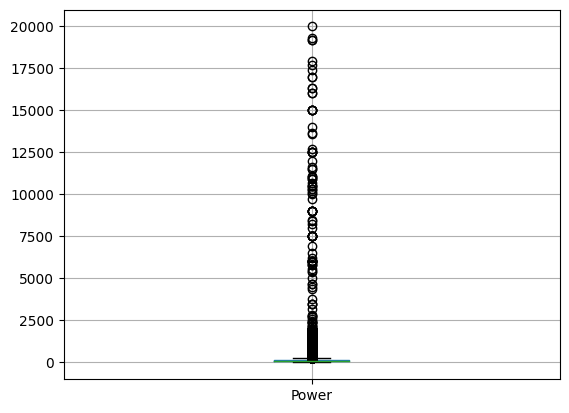

count    353391.000000
mean        110.187959
std         189.683874
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

In [25]:
df.boxplot(column= 'Power')
plt.show()
df['Power'].describe()

In [26]:
df = df.query("(Power > 20) and (Power <= 507)")

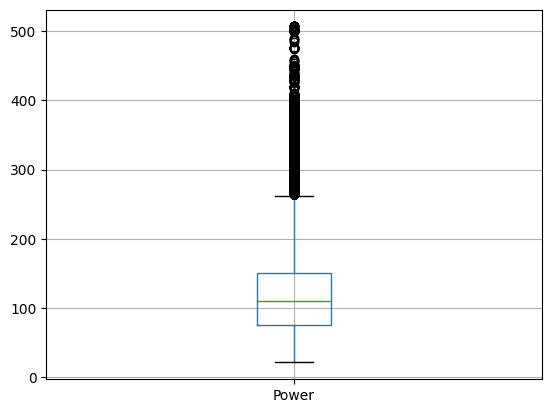

count    312780.000000
mean        120.226568
std          53.421041
min          21.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         507.000000
Name: Power, dtype: float64

In [27]:
df.boxplot(column= 'Power')
plt.show()
df['Power'].describe()

Again there are still plenty of outliers in the upper ranges of Power, but at least they are all plausible. 

In [28]:
print(df['NumberOfPictures'].value_counts())
print(df['NumberOfPictures'].unique())

0    312780
Name: NumberOfPictures, dtype: int64
[0]


It appears that there isn't a single picture of any of the vehicles.  We can drop this column for our analysis as it adds no insight or value.  There are also columns that we can drop as they will not improve our model.  These include DateCrawled, RegistrationMonth, DateCreated, PostalCode, LastSeen columns. Most of these provide insights on the individual users, but will not help us when building a model to determine car value and RegistrationMonth provides us little insight in determining the value of the care.

In [29]:
df = df.drop(['NumberOfPictures', 'DateCrawled', 'RegistrationMonth', 'DateCreated', 'PostalCode', 'LastSeen'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312780 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             312780 non-null  int64 
 1   VehicleType       312780 non-null  object
 2   RegistrationYear  312780 non-null  int64 
 3   Gearbox           312780 non-null  object
 4   Power             312780 non-null  int64 
 5   Model             312780 non-null  object
 6   Mileage           312780 non-null  int64 
 7   FuelType          312780 non-null  object
 8   Brand             312780 non-null  object
 9   NotRepaired       312780 non-null  object
dtypes: int64(4), object(6)
memory usage: 26.2+ MB


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed! We don't need these columns. 
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
- `DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.

    

- Another option is to drop `VehicleType` and `Brand`, since we have `Model` that should reflect both. 

</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>

In [30]:
print(df.duplicated().sum())

40587


In [31]:
df= df.drop_duplicates()
print(df.duplicated().sum())

0


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Well done! 

</div>

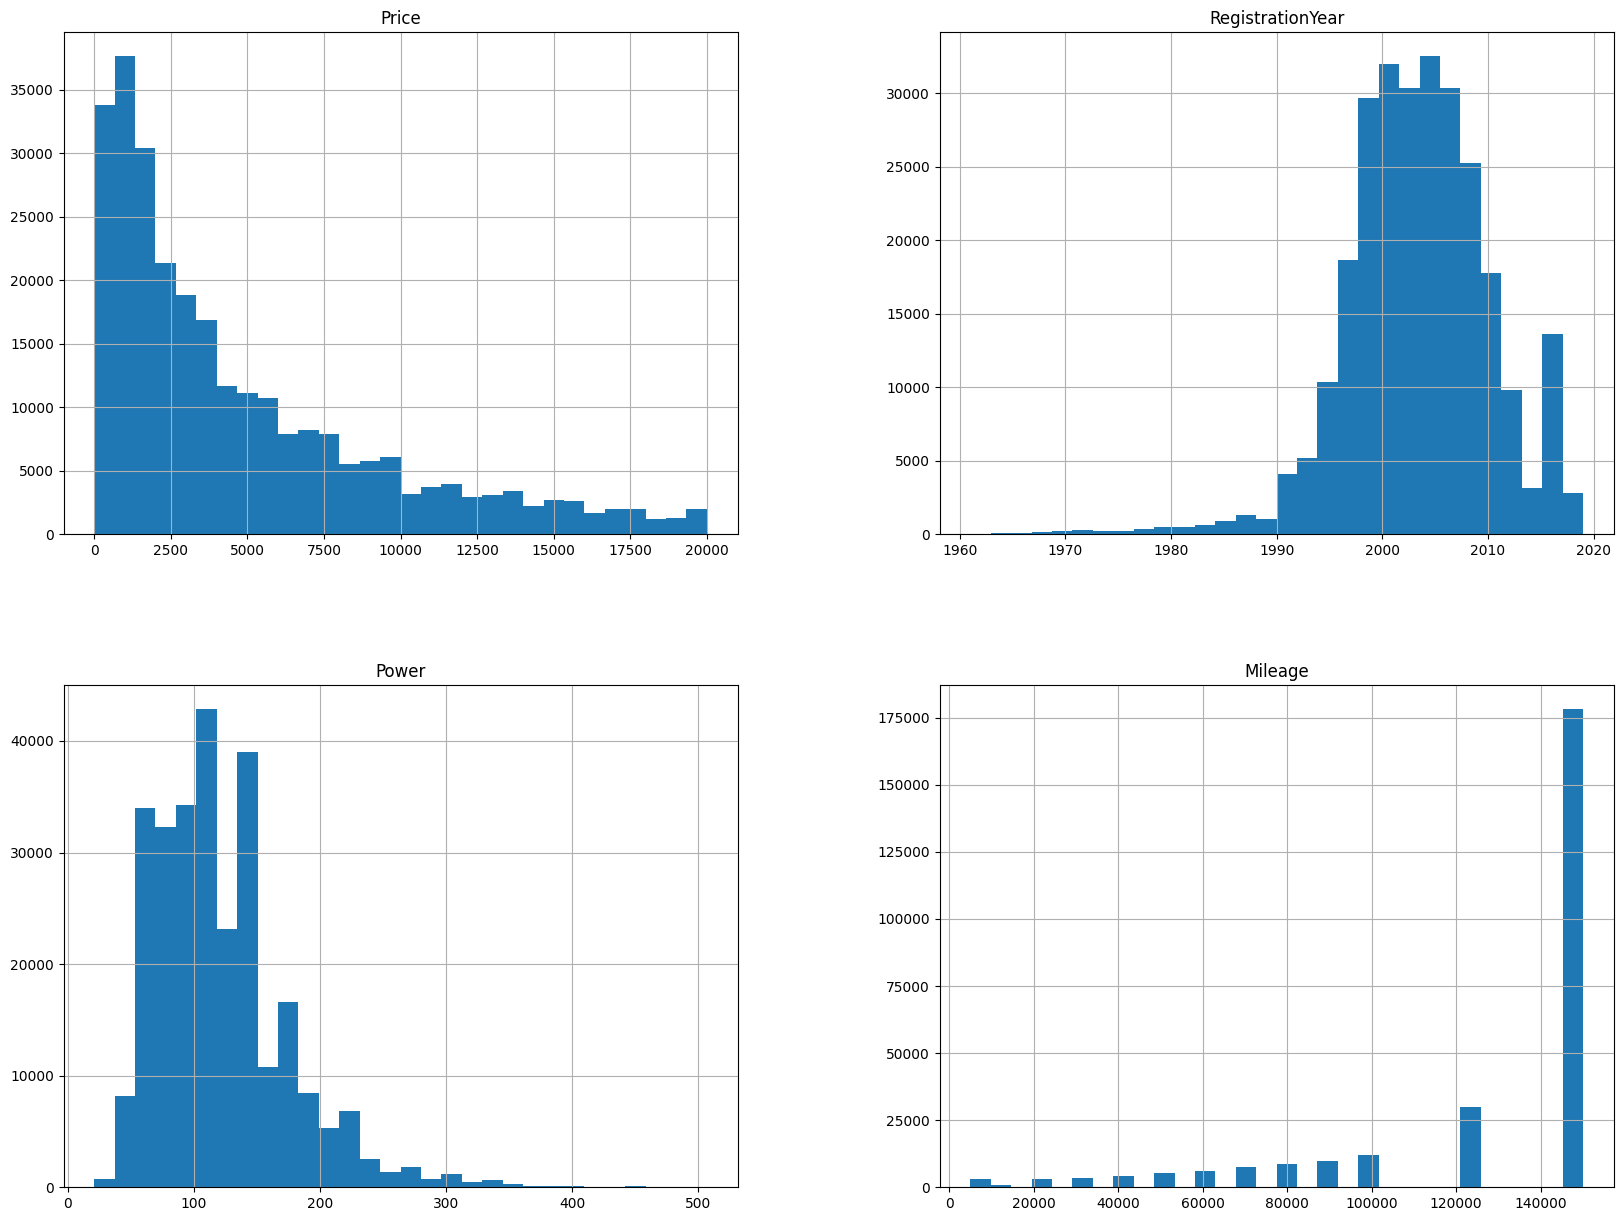

In [32]:
df.hist(bins=30, figsize= (20, 15))
plt.show()

With these histograms we can see the distribution for our numeric data.  We can see that Price is  skewed to the left and there is a significant amount of data that Rusty Bargain has deemed has $0 in value.  Registration Year is skewed to the Right which makes sense with the number of outliers for older cars.  Power is skewed to the left which again makes sense with the outliers above 300hp.  Finally for mileage we can see that there is a very significant skew to the right with a lot of the cars having over 14,000 miles. 

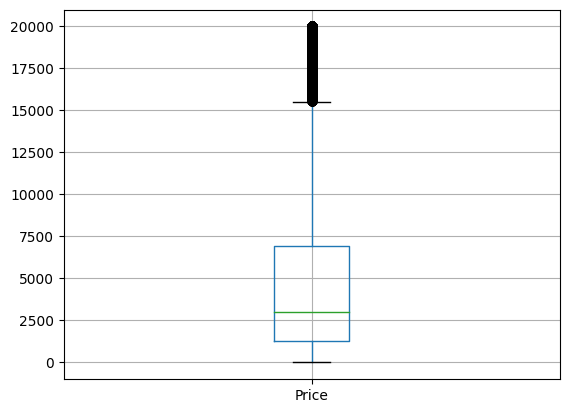

count    272193.000000
mean       4783.461731
std        4637.605227
min           0.000000
25%        1250.000000
50%        3000.000000
75%        6950.000000
max       20000.000000
Name: Price, dtype: float64

In [33]:
df.boxplot(column= 'Price')
plt.show()
df['Price'].describe()

In [34]:
#drop price outliers
df = df.query("(Price >= 0) and (Price <= 15000)")

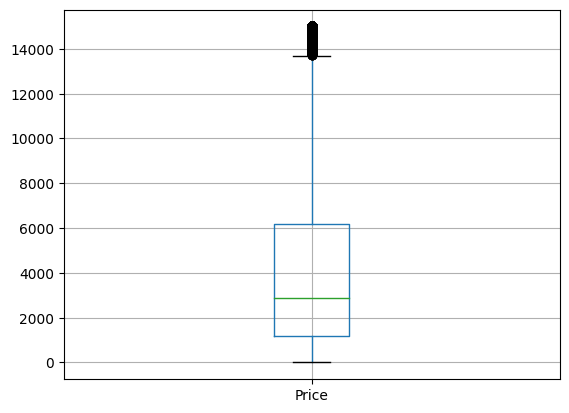

count    259077.000000
mean       4141.597236
std        3733.780475
min           0.000000
25%        1200.000000
50%        2900.000000
75%        6200.000000
max       15000.000000
Name: Price, dtype: float64

In [35]:
df.boxplot(column= 'Price')
plt.show()
df['Price'].describe()

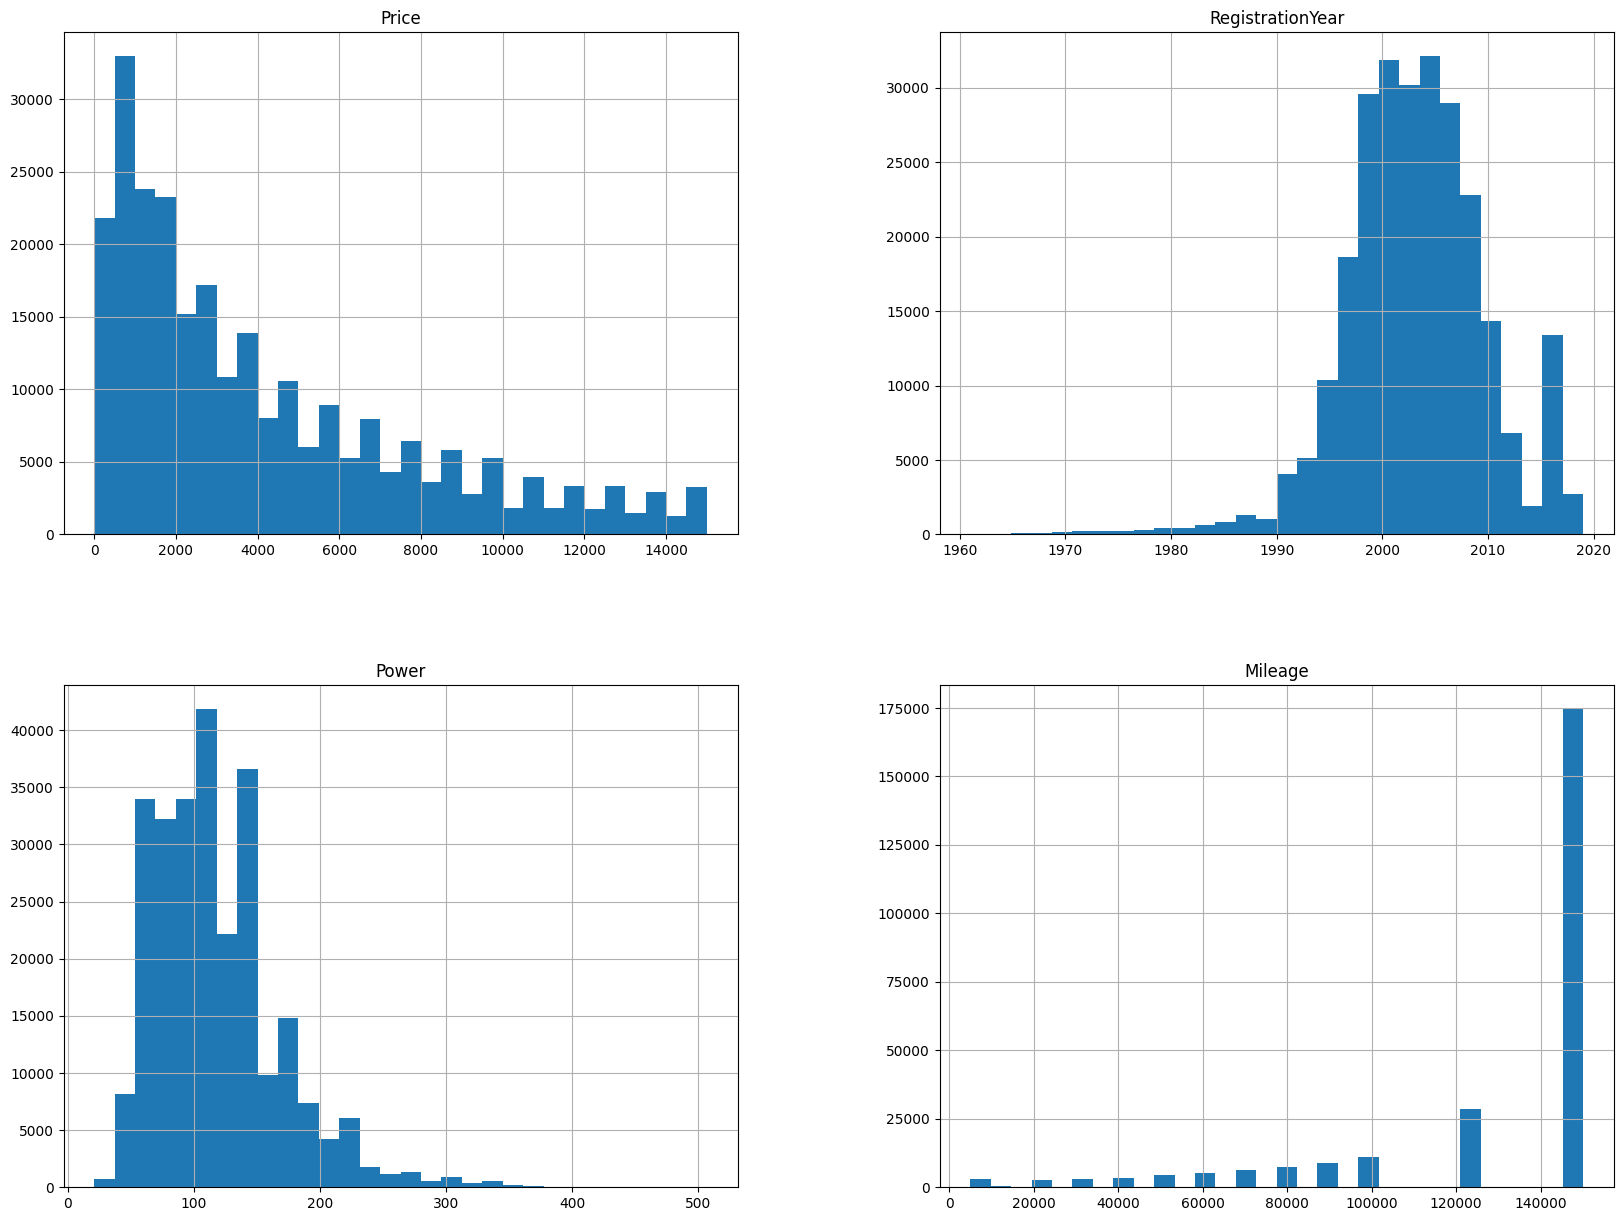

In [36]:
df.hist(bins=30, figsize= (20, 15))
plt.show()

Price is still slightly skewed to the left, but by much less.

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Consider excluding price outliers as well.
</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Shouldn't we drop price outliers? 
</div>

Now we can make bar plots of the value counts for the object type data to get a sense of the distribution of these.

Text(0.5, 1.0, 'VehicleType')

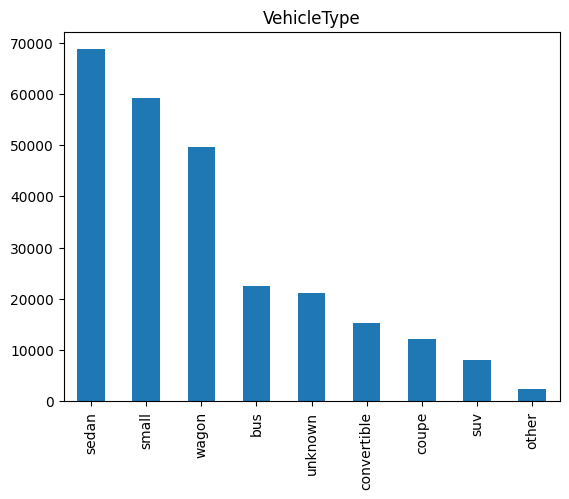

In [37]:
df['VehicleType'].value_counts().plot(kind='bar')
plt.title('VehicleType')

Most of the vehicles on Rusty Bargain are sedans, small cars or wagons.

Text(0.5, 1.0, 'Gearbox')

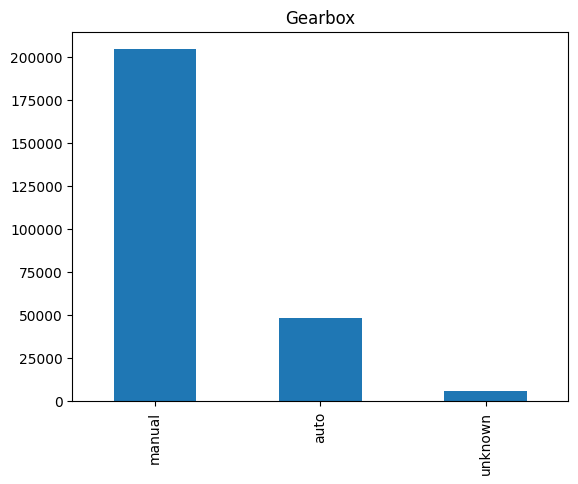

In [38]:
df['Gearbox'].value_counts().plot(kind='bar')
plt.title('Gearbox')

Most of the cars on the app are manual transmission.

Text(0.5, 1.0, 'Model')

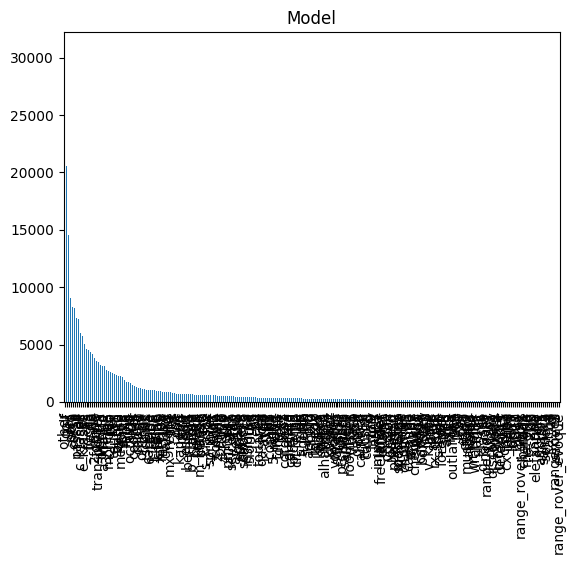

In [39]:
df['Model'].value_counts().plot(kind='bar')
plt.title('Model')

In [40]:
print(df['Model'].value_counts())

other                 30683
golf                  20553
3er                   14515
polo                   9050
astra                  8254
                      ...  
q3                        4
gl                        2
rangerover                2
serie_3                   2
range_rover_evoque        1
Name: Model, Length: 249, dtype: int64


The Model graph is very difficult to read as there are so many different model types of cars, but we can see here that a large amount are unmarked.

Text(0.5, 1.0, 'Brand')

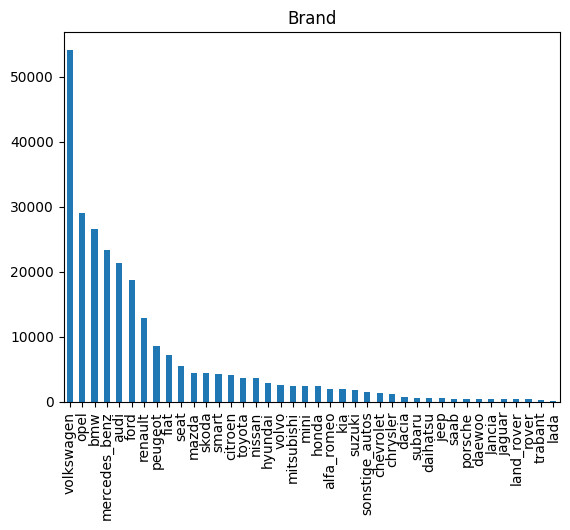

In [41]:
df['Brand'].value_counts().plot(kind='bar')
plt.title('Brand')

Again there is a wide variety of brands on the app, but there seems to be significantly more volkswagens.

Text(0.5, 1.0, 'NotRepaired')

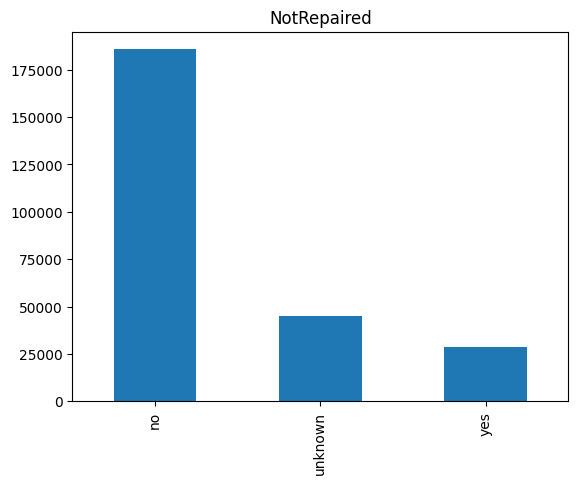

In [42]:
df['NotRepaired'].value_counts().plot(kind='bar')
plt.title('NotRepaired')

Most vehicles were not repaired.  Now we have a good understanding of the properties of the our data and have cleaned up some of the outliers, values that made no sense and narrowed our dataset so that it has the most value to creating more accurate models for predicting price.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
   
Good! 

</div>

## Model training

Before we can train our models we have to finish preparing our data.  First we will need to encode our object type data so that we can use it in our models.  Then we have to define our features and target.  Then we will have to split our data into a training set, a validation set and a test set.  After splitting our data we will want to scale our numerical columns to ensure those with very large numbers don't skew our models importance. 

In [43]:
#Encode Object Columns
#object_columns = df.select_dtypes(include='object')
#encoder = OrdinalEncoder()
#ordinal = pd.DataFrame(encoder.fit_transform(object_columns), columns=object_columns.columns)
# checking implementation
#ordinal.head()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Great choice! For tree-based models, `OrdinalEncoder` is a good choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.



`OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/).
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please note that `OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


For instance, you can use `Ordinal` for Forest and Tree, `OneHotEncoder` for Lin. Regression and categorical data types for boosting models.
</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
We need to encode data after we split it to avoid data leakage.  
</div>

In [44]:
#df_copy = df.copy()

In [45]:
#Replace the origianl object columns with the encoded ones
#df_copy[object_columns.columns] = ordinal

In [46]:
#confirm implementation by comparing original with copy
#display(df.head(5))

#display(df_copy.head(5))

In [47]:
#print(df_copy.isna().sum())
#df_copy.info()
#print(36609/312780)

With the encoding we have gotten new "missing values".  This is over 11% of our data so we don't want to just drop it.  What we can do is use iterative imputer.  This will fill the missing values based on multiple columns, creating more accurate fillings.  Then we'll have to round these to the nearest integer.

In [48]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

#imp = IterativeImputer()
#data_imp = imp.fit_transform(df_copy)

In [49]:
# making a new dataframe for encoded data, rounding to nearest integer
#df1 = pd.DataFrame(data_imp, columns=df.columns)
#df1 = df1.round({'vehicle_type':0, 'gearbox':0, 'model':0, 'brand':0, 'not_repaired':0, 'fuel_type':0})

In [50]:
# see that this was implemented
#df1.head()

In [51]:
#Creating our training, validation and test sets and identifying our numeric features
# 1- split into training (60%) and a temp set (40%)
data_train, data_temp = train_test_split(df, test_size=0.40, random_state=12345)

# 2- split the temp set into validation (20%) and test (20%)
data_valid, data_test = train_test_split(data_temp, test_size=0.50, random_state=12345)

data_train.info()
data_valid.info()
data_test.info()

# 3- create Training set, validation set and test set features and target

features_train= data_train.drop(['Price'], axis = 1)
target_train = data_train['Price']

features_valid= data_valid.drop(['Price'], axis = 1)
target_valid = data_valid['Price']

features_test= data_test.drop(['Price'], axis = 1)
target_test = data_test['Price']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155446 entries, 261898 to 291572
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             155446 non-null  int64 
 1   VehicleType       155446 non-null  object
 2   RegistrationYear  155446 non-null  int64 
 3   Gearbox           155446 non-null  object
 4   Power             155446 non-null  int64 
 5   Model             155446 non-null  object
 6   Mileage           155446 non-null  int64 
 7   FuelType          155446 non-null  object
 8   Brand             155446 non-null  object
 9   NotRepaired       155446 non-null  object
dtypes: int64(4), object(6)
memory usage: 13.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51815 entries, 35201 to 87637
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             51815 non-null  int64 
 1   VehicleType  

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we should have three subsets here: one for fitting the model, one for RMSE calculation and one for the very final test where we evaluate the best model. 

</div>

In [52]:
# Define categorical features
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'Brand', 'NotRepaired', 'FuelType']

# Apply OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
features_train[categorical_features] = encoder.fit_transform(features_train[categorical_features])
features_valid[categorical_features] = encoder.transform(features_valid[categorical_features])
features_test[categorical_features] = encoder.transform(features_test[categorical_features])

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct! 

</div>

In [53]:
#Scaling numerical features
numeric = ['RegistrationYear', 'Power', 'Mileage']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you scale data after you split it to avoid data leakage. 

</div>

Now that our data is prepared for modeling, we can train different types of models and play with gradient boosting and hyperparameter tuning with different gradient boosting models.

## Decision Tree

In [54]:
best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 15): # choose hyperparameter range
    dec_tr = DecisionTreeRegressor(random_state=19, max_depth=depth)
    dec_tr.fit(features_train, target_train) # train model on training set
    predictions_valid_dt = dec_tr.predict(features_valid) # get model predictions on validation set
    result = mse(target_valid, predictions_valid_dt) ** 0.5
    if result < best_result:
        best_model = dec_tr
        best_result = result
        best_depth = depth

print(f"RMSE of the best model on the validation set (max_depth = {best_depth}): {best_result}")

RMSE of the best model on the validation set (max_depth = 3): 3736.921848591124


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
You have successfully implemented hyperparameters tuning, well done!     

    
    
    
It's good that you use the training subset to fit the model and validation to calculate metric. Note that we do not touch the test subset until we train and compare all models. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Please estimate training, not tuning time. You can do it as follows:


```python
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()  
```

</div>

In [55]:
best_dec_tr = DecisionTreeRegressor(random_state=19, max_depth=3)
best_dec_tr.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=19)

In [56]:
%%timeit -n 1 -r 1
# Time training
best_dec_tr.fit(features_train, target_train)

81.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [57]:
%%timeit -n 1 -r 1
# Decision tree prediction time
best_dec_tr.predict(features_test)

4.31 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
You can also calculate fitting and prediction time in the loop above. 

</div>

## Random Forest

In [58]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(40, 51, 5):
    for depth in range (10, 15, 5):
        rf = RandomForestRegressor(random_state=19, n_estimators=est, max_depth=depth)
        rf.fit(features_train, target_train) # train model on training set
        predictions_valid_rf = rf.predict(features_valid) # get model predictions on validation set
        result = mse(target_valid, predictions_valid_rf) ** 0.5 # calculate RMSE on validation set
        if result < best_result:
            best_model = rf
            best_result = result
            best_est = est
            best_depth = depth

print("RMSE of the best model on the validation set:", best_result, "n_estimators:", best_est, "best_depth:", depth)


RMSE of the best model on the validation set: 6523.838962865627 n_estimators: 40 best_depth: 10


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Same issue. 


</div>

In [59]:
best_rf = RandomForestRegressor(random_state=19, n_estimators= 45, max_depth= 10)
best_rf.fit(features_train, target_train)

RandomForestRegressor(max_depth=10, n_estimators=45, random_state=19)

In [60]:
%%timeit -n 1 -r 1

# Train time

best_rf.fit(features_train, target_train)

6.62 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [61]:
%%timeit -n 1 -r 1
# random forest prediction
best_rf.predict(features_test)

172 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Good. 

</div>

## Linear Regression (Sanity Check)

In [62]:
%%timeit -n 1 -r 1

# Linear regression
lr = LinearRegression() # initialize model constructor
lr.fit(features_train, target_train) # train model on training set
predictions_valid_lr = lr.predict(features_valid) # get model predictions on validation set

result = mse(target_valid, predictions_valid_lr) ** 0.5 # calculate RMSE on validation set
print("RMSE of the linear regression model on the validation set:", result)

RMSE of the linear regression model on the validation set: 165466193.30585766
24.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
  
    
Although it is exactly what the task says, using Linear Regression as a "sanity check" is technically a bit misleading. For sanity check, we use some constant models or predict the averages. Linear Regression, while simple, is still a learned model, and often gives reasonably good performance. It's more appropriate to refer to it as a baseline model, not a sanity check.
</div>

In [63]:
# Train and store model in regular cell
best_lr = LinearRegression()
best_lr.fit(features_train, target_train)

LinearRegression()

In [64]:
%%timeit -n 1 -r 1
# Linear Regression prediction
best_lr.predict(features_test)

72.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Based on the RMSE scores scores above, the Decision Tree had the best score, and the Linear Regression model, had the worst as expected. The Linear Regression model was the quickest to train, but had the least accurate results. The Random Forest was the longest to train.

# Boosting Models

## XG Boost

In [65]:
#%%timeit -n 1 -r 1

X2 = df.drop(['Price'], axis=1)
y2 = df['Price']

lbl = LabelEncoder()
X2.VehicleType = lbl.fit_transform(X2.VehicleType.astype(str))
X2.Gearbox = lbl.fit_transform(X2.Gearbox.astype(str))
X2.Model = lbl.fit_transform(X2.Model.astype(str))
X2.FuelType = lbl.fit_transform(X2.FuelType.astype(str))
X2.Brand = lbl.fit_transform(X2.Brand.astype(str))
X2.NotRepaired = lbl.fit_transform(X2.NotRepaired.astype(str))


X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, random_state=19)

X2_train, X2_valid, y2_train, y2_valid = train_test_split(
    X2_train, y2_train, test_size=0.20, random_state=19)


# Create a XGBM 
xgbr = xgb.XGBRegressor(random_state=19, eval_metric='rmse')

xgbr.fit(X2_train, y2_train)

# Make predictions on the test set
predictions_xgbr = xgbr.predict(X2_valid)

result = mse(y2_valid, predictions_xgbr) ** 0.5 # calculate RMSE on validation set
print()
print("RMSE of the xgbm model on the validation set:", result)


RMSE of the xgbm model on the validation set: 1565.588698837361


In [66]:
%%timeit -n 1 -r 1
# Create a XGBM  in regular cell
xgbr = xgb.XGBRegressor(random_state=19, eval_metric='rmse')

xgbr.fit(X2_train, y2_train)

12.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [67]:
%%timeit
# xg boost prediction
predictions_xgbr = xgbr.predict(X2_test)

97.2 ms ± 6.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
# xg boost parameters
xgbr.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=19,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)>

In [69]:
# table of feature importance
xgbr_imp = [t for t in zip(X2, xgbr.feature_importances_)]
xgbr_imp_df = pd.DataFrame(xgbr_imp, columns=['feature', 'varimp'])
xgbr_imp_df = xgbr_imp_df.sort_values('varimp', ascending=False)

In [70]:
print(xgbr_imp_df.head())

            feature    varimp
1  RegistrationYear  0.391307
3             Power  0.178233
8       NotRepaired  0.122409
5           Mileage  0.109478
0       VehicleType  0.061370


## Light GBM

In [71]:
# LGBM

X = df.drop(['Price'], axis=1)
y = df['Price']

obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)

for feature in obj_feat:
    X[feature] = pd.Series(X[feature], dtype='category')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=19)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.20, random_state=19)

# Create a LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train, params={'verbose': -1}, free_raw_data=False)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train, params={'verbose': -1}, free_raw_data=False)

# Define the parameters for the LightGBM model
params = {
    'objective': 'regression',
    'metric': 'root_mean_squared_error',
    'boosting_type': 'gbdt',
    'random_state': 19,
    'verbose':-1
}


# Train the LightGBM model
lgbm = lgb.train(params, lgb_train, valid_sets=lgb_valid, num_boost_round=4000, early_stopping_rounds=500, verbose_eval=False)

# Make predictions on the validation set
predictions_valid_lgbm = lgbm.predict(X_valid)

result = mse(y_valid, predictions_valid_lgbm) ** 0.5 # calculate RMSE on validation set
print()
print("RMSE of the lgbm model on the validation set:", result)

/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/.venv/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overri


RMSE of the lgbm model on the validation set: 1513.1853481408134


In [72]:
%%timeit -n 1 -r 1
#time of lgbm training

lgbm = lgb.train(params, lgb_train, valid_sets=lgb_valid, num_boost_round=4000, early_stopping_rounds=500, verbose_eval=False)


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


17.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [73]:
%%timeit
# light gbm prediction
lgbm.predict(X_valid[:2])

24.3 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>

    
Nice results! 
</div>

In [74]:
# table of feature importance
feat_imp = [t for t in zip(X, lgbm.feature_importance())]
feat_imp_df = pd.DataFrame(feat_imp, columns=['feature', 'varimp'])
feat_imp_df = feat_imp_df.sort_values('varimp', ascending=False)

In [75]:
print(feat_imp_df)

            feature  varimp
3             Power   12047
1  RegistrationYear   10361
5           Mileage    4762
4             Model    4249
8       NotRepaired    1869
7             Brand    1744
0       VehicleType    1685
2           Gearbox    1349
6          FuelType     634


## Catboost

In [76]:
# %%timeit
# catboost
X1 = df.drop(['Price'], axis=1)
y1 = df['Price']


X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.25, random_state=19)

X1_train, X1_valid, y1_train, y1_valid = train_test_split(
    X1_train, y1_train, test_size=0.20, random_state=19)

# fill missing values as string NaN

cat_features = [
    'VehicleType',
    'Gearbox',
    'Model',
    'FuelType', 
    'Brand', 
    'NotRepaired'
]

catb = CatBoostRegressor(task_type='CPU', loss_function='RMSE', eval_metric='RMSE', iterations=1500, random_seed=19)

catb.fit(X1_train, y1_train, eval_set=(X1_valid, y1_valid), cat_features=cat_features, verbose=100, use_best_model=True)

# Make predictions on the test set
predictions_valid_catb = catb.predict(X1_valid)

result = mse(y1_valid, predictions_valid_catb) ** 0.5 # calculate RMSE on validation set
print()
print("Catboost model on the validation set: ")
catb.best_score_


Learning rate set to 0.087813
0:	learn: 3543.3507427	test: 3527.3896197	best: 3527.3896197 (0)	total: 153ms	remaining: 3m 48s
100:	learn: 1647.4372765	test: 1673.7627285	best: 1673.7627285 (100)	total: 7.22s	remaining: 1m 40s
200:	learn: 1574.0437046	test: 1616.0771667	best: 1616.0771667 (200)	total: 14.3s	remaining: 1m 32s
300:	learn: 1543.1644349	test: 1594.6546361	best: 1594.6546361 (300)	total: 21.4s	remaining: 1m 25s
400:	learn: 1524.7261121	test: 1584.1847285	best: 1584.1847285 (400)	total: 28.4s	remaining: 1m 17s
500:	learn: 1511.0530377	test: 1577.2945929	best: 1577.2945929 (500)	total: 35.5s	remaining: 1m 10s
600:	learn: 1498.8273073	test: 1571.3178445	best: 1571.3178445 (600)	total: 42.6s	remaining: 1m 3s
700:	learn: 1488.7985203	test: 1566.1681386	best: 1566.1681386 (700)	total: 49.9s	remaining: 56.8s
800:	learn: 1478.5809694	test: 1561.5396038	best: 1561.5396038 (800)	total: 57.2s	remaining: 49.9s
900:	learn: 1470.0566900	test: 1557.1400692	best: 1557.1325221 (897)	total: 1

{'learn': {'RMSE': 1432.7976046074089},
 'validation': {'RMSE': 1544.6299043536444}}

In [77]:
%%timeit -n 1 -r 1
# catboost predictions
catb.predict(X1)

1.31 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [78]:
# table of feature importance
feat_import = [t for t in zip(X1, catb.get_feature_importance())]
feat_import_df = pd.DataFrame(feat_import, columns=['feature', 'varimp'])
feat_import_df = feat_import_df.sort_values('varimp', ascending=False)

In [79]:
print(feat_import_df)

            feature     varimp
1  RegistrationYear  36.351880
3             Power  22.277118
0       VehicleType  12.271684
5           Mileage   9.858834
7             Brand   9.188712
4             Model   4.079490
8       NotRepaired   3.814352
6          FuelType   1.594394
2           Gearbox   0.563538


Based on these results the lgbm model has the best RMSE, then the Catboost model and the xgb model has the highest score.  The Catboost model took the longest to train, but was the fastest with predictions. The xgb model was the fastest with training and the lgbm model was the sloest with predictions.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>

    
Great! 
</div>

## Model analysis

Next we will compare all of the different models and boosting methods, to determine which one is best.

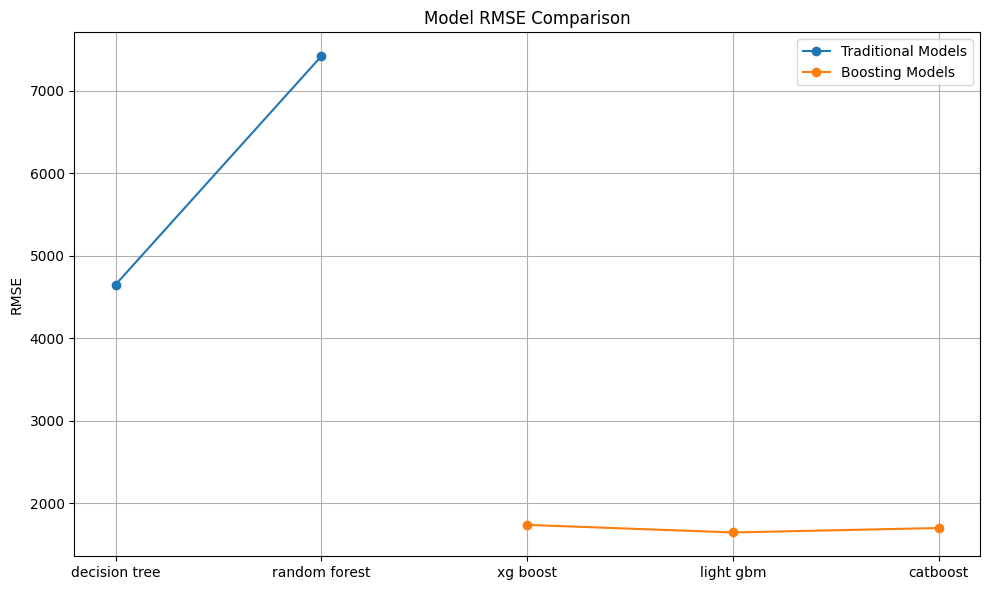

In [80]:
# Sample data 
regr_rmse = [4649, 7420]  #truncated RMSE to integer(did not round) #left out linear regression as it skewed the chart too mcuh since it was so high
boost_rmse = [1736, 1644, 1698] #truncated RMSE to integer(did not round)

# Labels for x-axis
regr_labels = ['decision tree', 'random forest']
boost_labels = ['xg boost', 'light gbm', 'catboost']

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot each group
plt.plot(regr_labels, regr_rmse, marker='o', label='Traditional Models')
plt.plot(boost_labels, boost_rmse, marker='o', label='Boosting Models')

# Chart styling
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


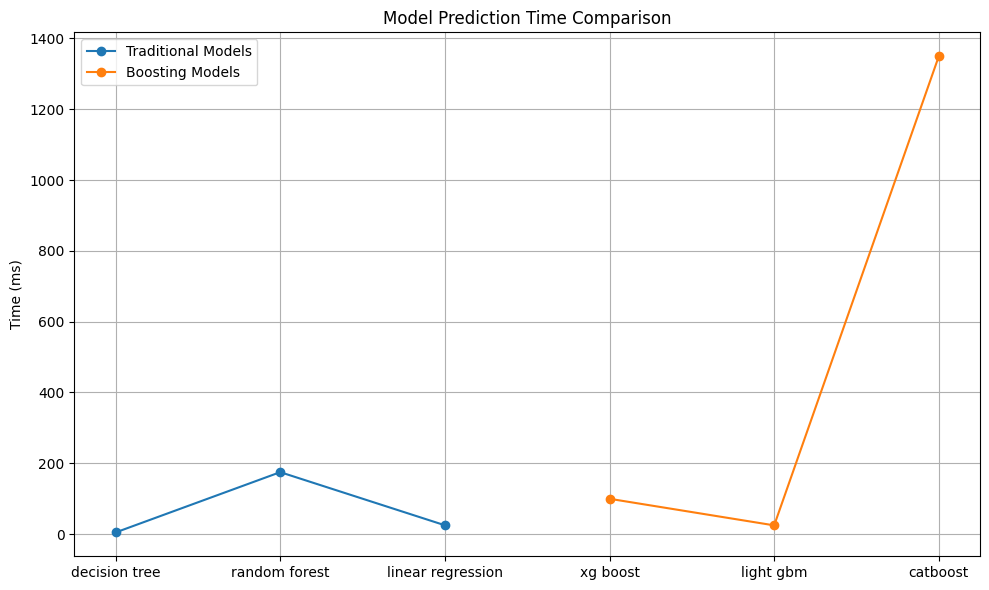

In [81]:
# Sample data 
regr_predict_time = [4.67, 175, 25] 
boost_predict_time = [99.8, 24.7, 1350]

# Labels for x-axis
regr_labels = ['decision tree', 'random forest', 'linear regression']
boost_labels = ['xg boost', 'light gbm', 'catboost']

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot each group
plt.plot(regr_labels, regr_predict_time, marker='o', label='Traditional Models')
plt.plot(boost_labels, boost_predict_time, marker='o', label='Boosting Models')

# Chart styling
plt.title('Model Prediction Time Comparison')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great! 
</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Consider using two separate charts, as blue and orange lines have very different scales. It will be easier to compare time values on two separate charts. 
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>

    
Since the difference between these values is low, it's better to use a bar chart. 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    
Would you please compare their prediction time as well? The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.


</div>    

As the chart clearly demonstrates, light gbm gives us the most accurate model by RMSE and has the fastest prediction time.  As we discussed in the previous section, it takes a little more time to train, 30.8s, compared to faster models, but it is not all that slow.  Same goes for its prediction speeds although it is the slowest. Therefore, it would be the best model to use for Rusty Bargain as it would create the most accurate value for the cars, it is fairly quick with training, and although it is the slowest with prediction it only takes an average of 25 ms to run, which for a user will not be too long to wait.

Run the Final Model - Light GBM

In [ ]:
# Make predictions on the validation set
predictions_test_lgbm = lgbm.predict(X_test)

result = mse(y_test, predictions_test_lgbm) ** 0.5 # calculate RMSE on test set
print()
print("RMSE of the lgbm model on the test set:", result)

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Well done! I ran the project on my local device, so there's no output here. 
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


    
Good!     
    
</div> 

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    

    
Let's add the overall conclusion to your project: what has been done and what can be inferred from the results. What models did you test? What are their RMSE scores? What are their speed values? Why did you choose a specific model and how did it perform on the final test? 


</div>

# Conclusion

Based on the results of this project we have determined that the Light GBM model would be the most effective for the Rusty Bargain app to determine a car's value.  This is because although it is in the middle for training time speed out of all the models tested it has the best RMSE, so the best accuracy) and a very low prediction speed, meaning that it would provide an answer very quickly for customers using the app. To determine what model was best, we tested all our basic regression models and hypertuned the parameters to ensure the best results and then did the same for multiple gradient boosting models.  Comparing the RMSE scores Light GBM was the best at 1644, then CatBoost at 1698, then XG Boost at 1736, then our Decision Tree at 4649, then our Random Forest at 7420 and our linear regression model with the worst RMSE of over 165 million.  Training and Prediction speed is where CatBoost fell behind being the slowest in both. Light GBM and XG Boost were the next 2 slowest in training followed by the Random Forest Model and the Decision Tree with the Linear Regression being the fastest.  This shows that Gradient Boosting models may take more time to train, but can be more accurate, and once trained generally (besdies CatBoost), have fairly quick prediction times.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent job! 
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed